In [ ]:
# Step 1: Import libraries
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Step 3: Preview the training data
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 670.4 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.1 MB 670.4 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.1 MB 745.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.1 MB 825.2 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 860.2 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 902.1 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.1 MB 958.5 kB/s eta 0:00:07
   ---------- -----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rajlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Train shape: (18524, 9)
Test shape: (6175, 8)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


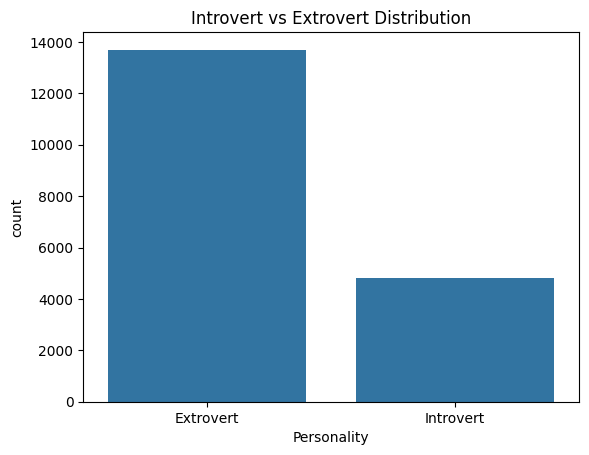

Missing Values:
 Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
dtype: int64



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rajlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


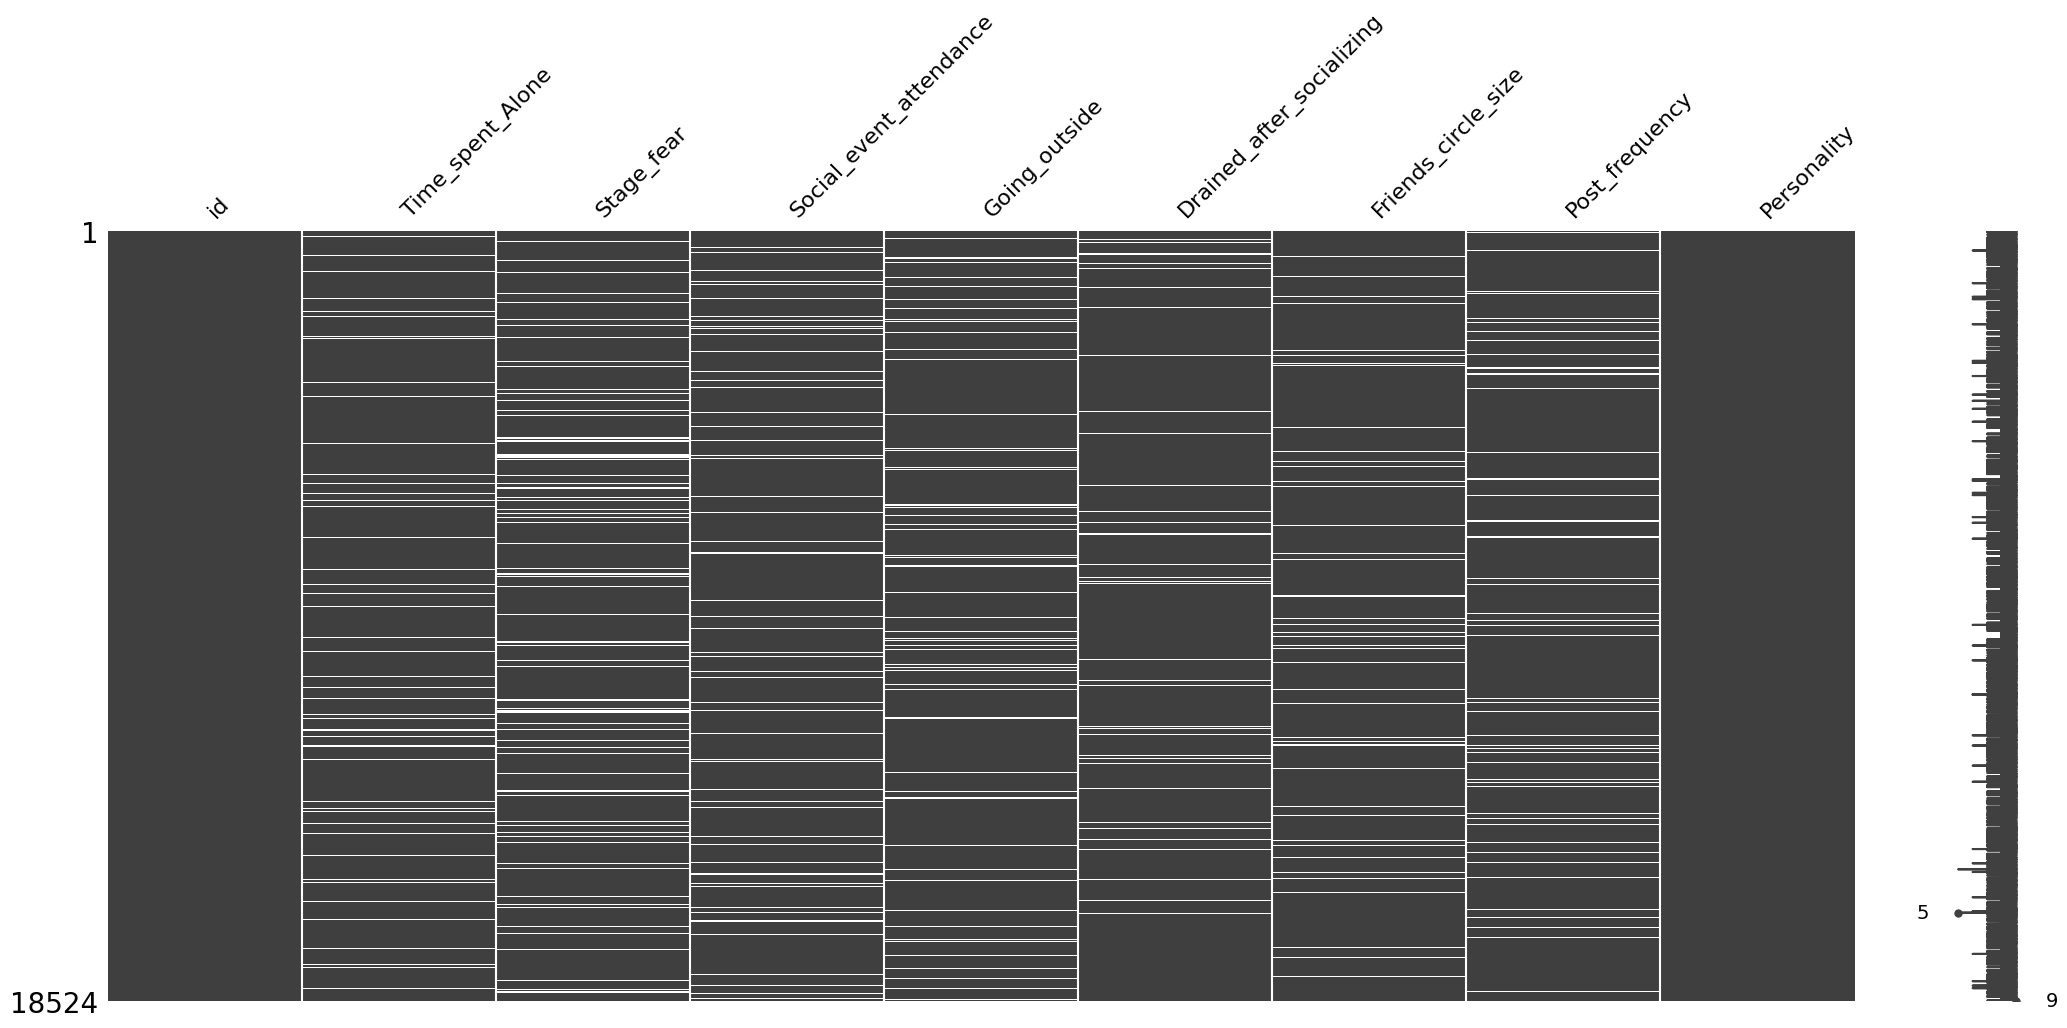

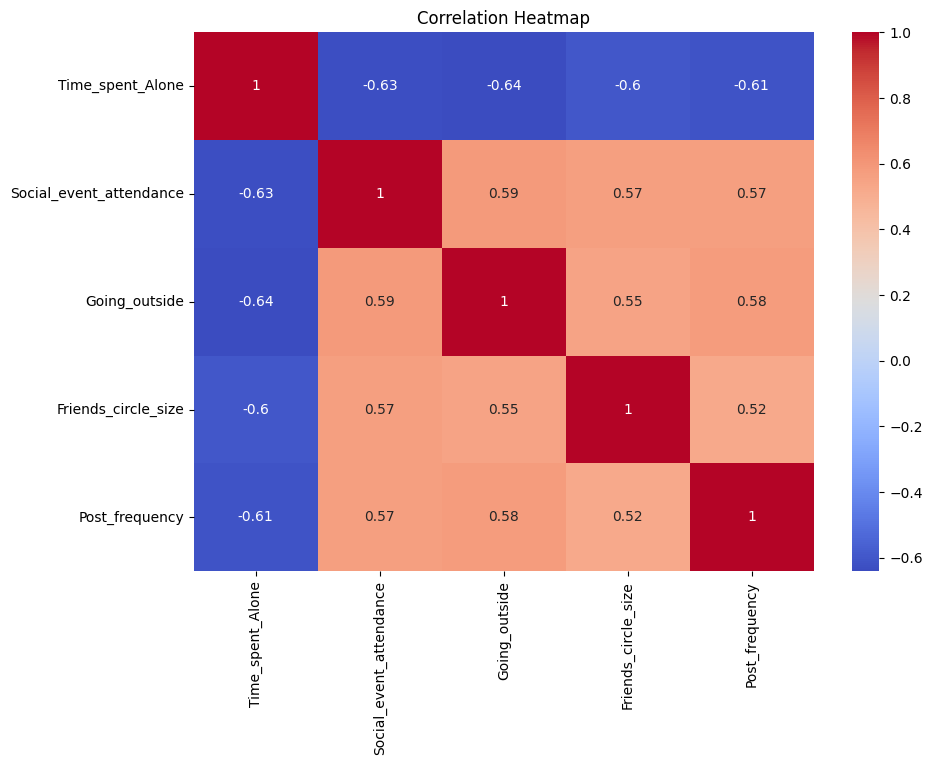

In [4]:
# Step 4: Check target variable distribution
sns.countplot(x='Personality', data=train)
plt.title("Introvert vs Extrovert Distribution")
plt.show()

# Step 5: Check missing values
missing = train.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing)

# Step 6: Visualize missing values (optional)
%pip install missingno
import missingno as msno
msno.matrix(train)
plt.show()

# Step 7: Correlation heatmap (numeric features only)
numeric_cols = train.select_dtypes(include=['float64', 'int64']).drop(columns=['id']).columns
plt.figure(figsize=(10, 7))
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [7]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Prepare features and target
X = train[numeric_cols]
y = train['Personality']
X_test = test[numeric_cols]

# Step 1: Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

# Step 2: Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_val)
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
🔹 Logistic Regression Accuracy: 0.970310391363023



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rajlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Step 1: Predict on test set
test_preds = lr.predict(X_test_imputed)

# Step 2: Convert predictions back to labels (0 → Introvert, 1 → Extrovert)
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': ['Introvert' if p == 0 else 'Extrovert' for p in test_preds]
})

# Step 3: Save CSV file
submission.to_csv("submission_logistic.csv", index=False)
print("✅ Submission file created: submission_logistic.csv")


✅ Submission file created: submission_logistic.csv


🔹 Random Forest Accuracy: 0.9622132253711201
              precision    recall  f1-score   support

   Extrovert       0.98      0.97      0.97      2740
   Introvert       0.92      0.93      0.93       965

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



C:\Users\rajlo\AppData\Local\Temp\ipykernel_6272\382211786.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rajlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


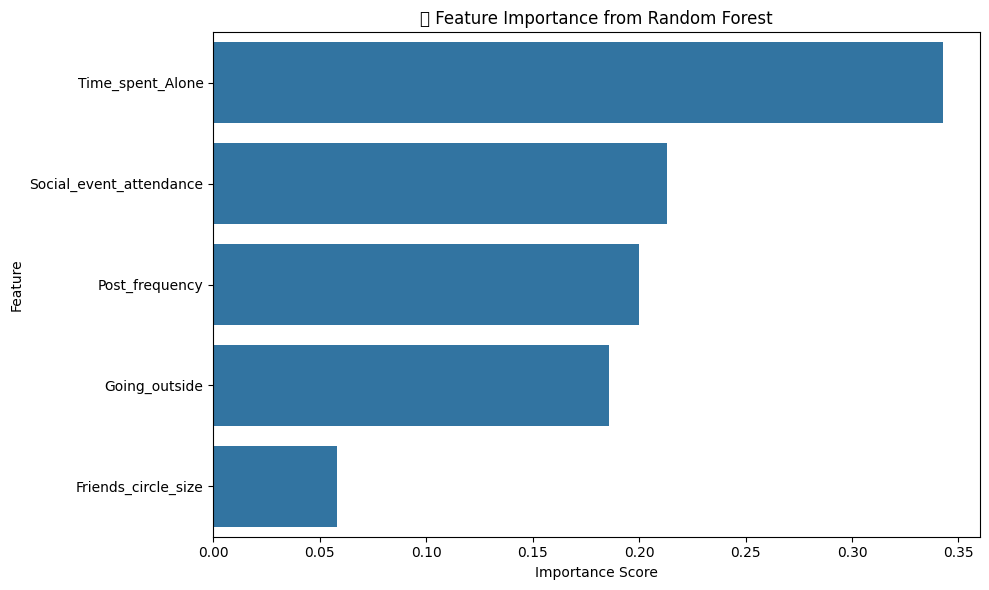

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)

# Step 2: Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("🔹 Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))

# Step 3: Feature Importance Plot
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("🔍 Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [10]:
# 🔁 Predict test data using trained Random Forest model
rf_test_preds = rf.predict(X_test_imputed)

# 🗃️ Format predictions to match Kaggle requirement
submission_rf = pd.DataFrame({
    'id': test['id'],
    'Personality': ['Introvert' if p == 0 else 'Extrovert' for p in rf_test_preds]
})

# 💾 Save to CSV
submission_rf.to_csv("submission_rf.csv", index=False)
print("✅ submission_rf.csv created successfully!")


✅ submission_rf.csv created successfully!
